In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df = df[['sepal_length', 'petal_length', 'species']]

In [6]:
df.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [8]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [10]:
clf = LogisticRegression(multi_class='multinomial')

In [11]:
clf.fit(x, y)

LogisticRegression(multi_class='multinomial')

In [12]:
y_pred = clf.predict(x_test)

In [14]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [15]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [18]:
#prediction
query = np.array([[4.6, 5.7]])
clf.predict_proba(query)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.05427261e-06, 1.19083260e-02, 9.88084620e-01]])

In [19]:
clf.predict(query)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

having greater probabilty of virginica

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


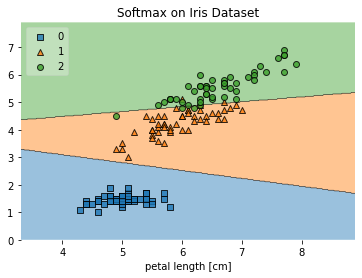

In [20]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris Dataset')

plt.show()